# Test Model _ver 2

In [ ]:
#!git clone https://github.com/Sh41lD4n1n/FederatedLearning

In [ ]:
!pwd

In [ ]:
#/kaggle/input/federatedlearning/FederatedLearning
#/kaggle/working

In [ ]:
import os
os.chdir("/kaggle/input/federatedlearning")

In [ ]:
!pwd

In [ ]:
#!git checkout CNN_model

In [ ]:
import os

os.chdir("./Models/CNN_model")
#!ls
from Model import Model#,Optimizer_SGD
from Data import Data

os.chdir("../..")
!ls

from Models.MatrixScheduler.MatrixScheduler_identical import MatrixScheduler_identical
from Models.MatrixScheduler.MatrixScheduler_Uniform import MatrixScheduler_Uniform
from Models.FederatedLearning.Server import server
from Models.StatisticClass import Statistic,array_mean_object

#os.chdir("../Reports")
import matplotlib.pyplot as plt
import numpy as np
#!ls

In [ ]:
import torch.optim as optim

In [ ]:
!pwd

In [ ]:
os.chdir("/kaggle/working")

In [ ]:
!pwd

In [ ]:
Data.SPLITS

['het',
 'ident',
 'random_indent',
 'ident_same',
 'noSplit',
 'noSplit_test_split']

## Data  

In [ ]:
d = Data(split = Data.SPLITS[0],n_workers=3,environment = "")
d1 = Data(split = Data.SPLITS[1],n_workers=3,environment = "")
d2 = Data(split = Data.SPLITS[2],n_workers=3,environment = "")
d3 = Data(split = Data.SPLITS[3],n_workers=3,environment = "")
d4 = Data(split = "noSplit",n_workers=1,environment = "")
d5 = Data(split = Data.SPLITS[-1],n_workers=3,environment = "")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


het


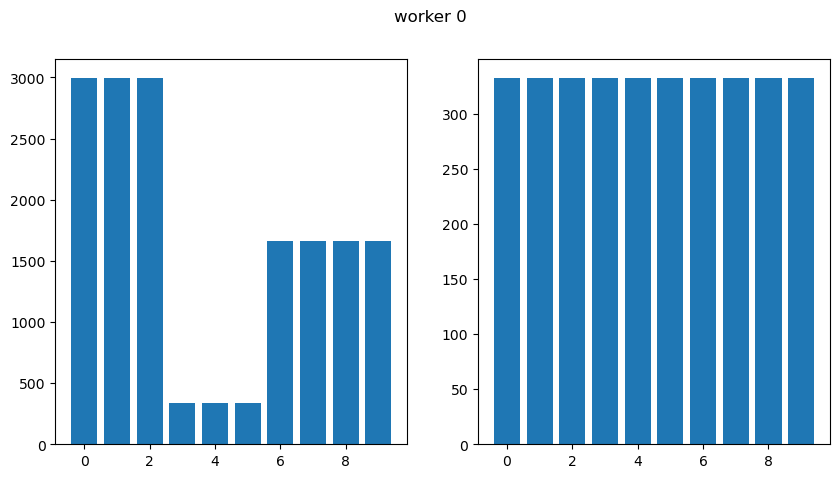

16660 3330 % of test  0.16658329164582292


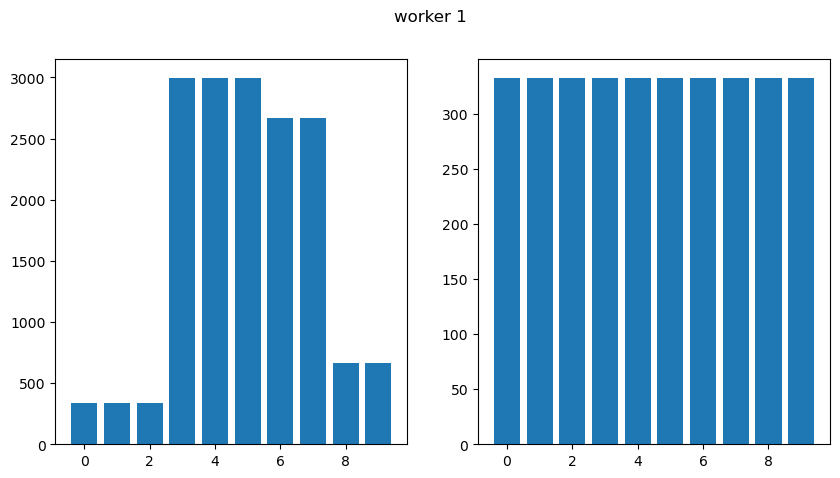

16660 3330 % of test  0.16658329164582292


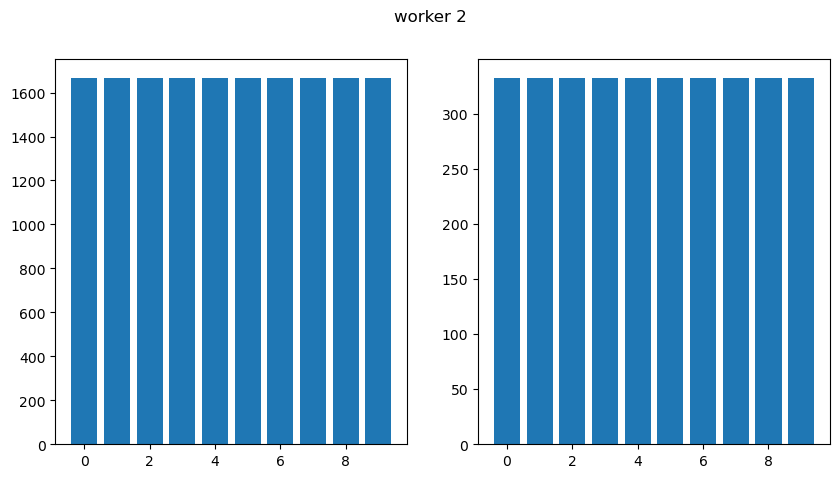

16680 3330 % of test  0.1664167916041979


In [ ]:
print(Data.SPLITS[0])
trains,tests = d.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.targets,return_counts = True)
    val1,counts1 = np.unique(test.targets,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()
    print(len(train),len(test),"% of test ",len(test)/(len(train)+len(test)))

ident


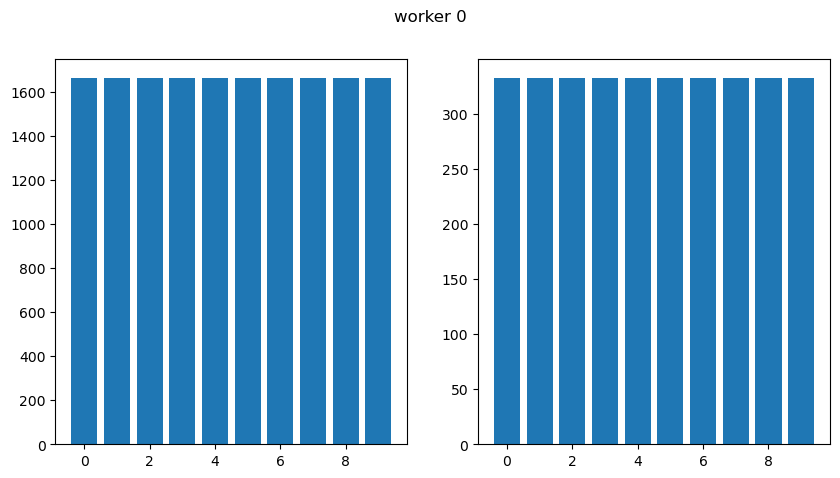

16660 3330 % of test  0.16658329164582292


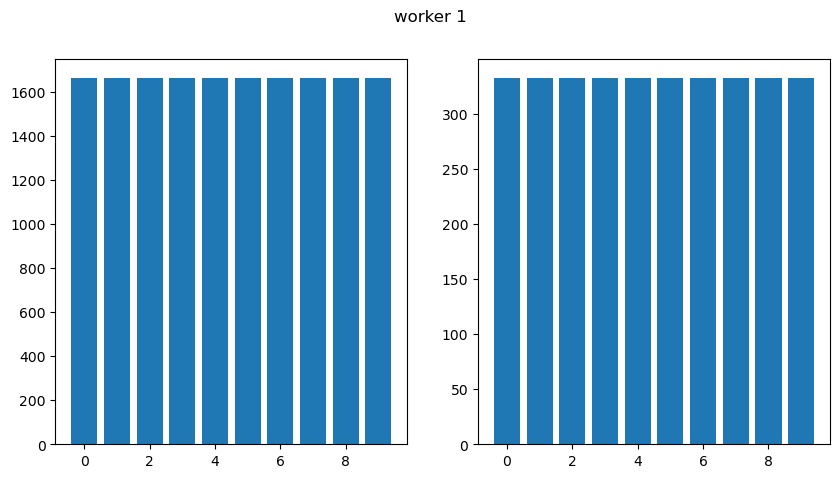

16660 3330 % of test  0.16658329164582292


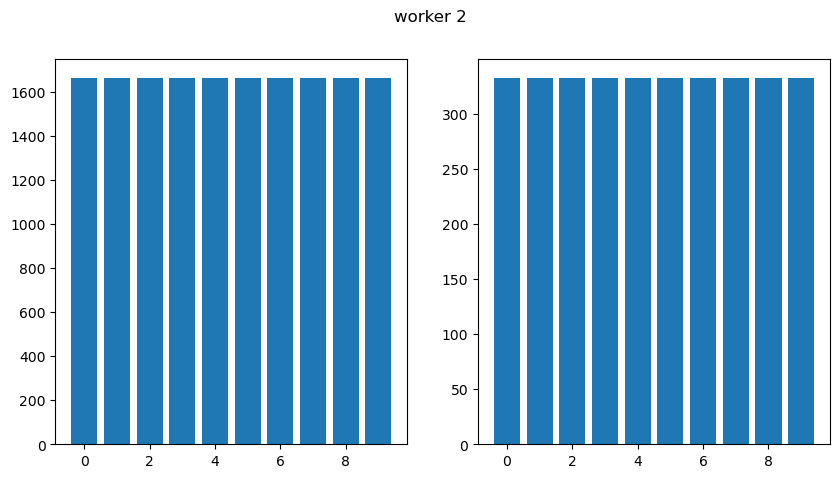

16660 3330 % of test  0.16658329164582292


In [ ]:
print(Data.SPLITS[1])
trains,tests = d1.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.targets,return_counts = True)
    val1,counts1 = np.unique(test.targets,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()
    print(len(train),len(test),"% of test ",len(test)/(len(train)+len(test)))

random_indent


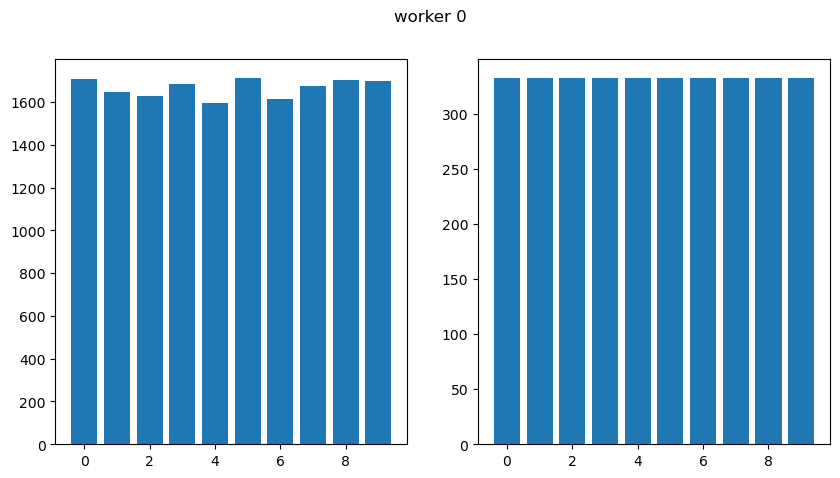

16666 3330 % of test  0.16653330666133226


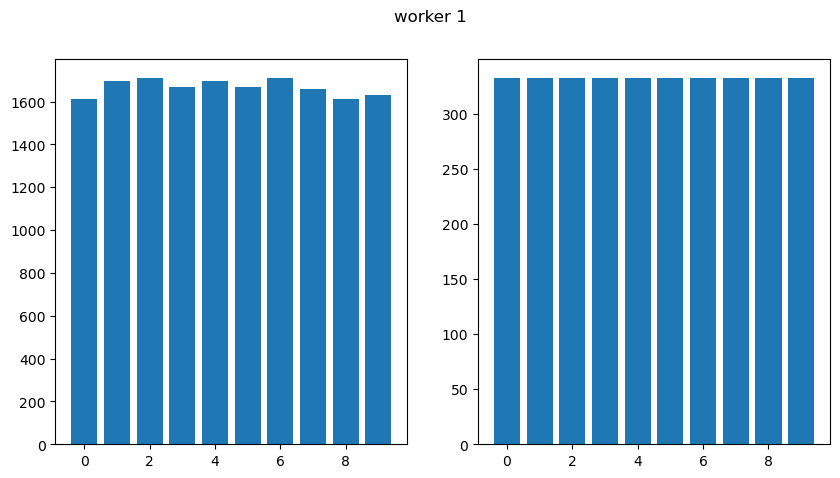

16666 3330 % of test  0.16653330666133226


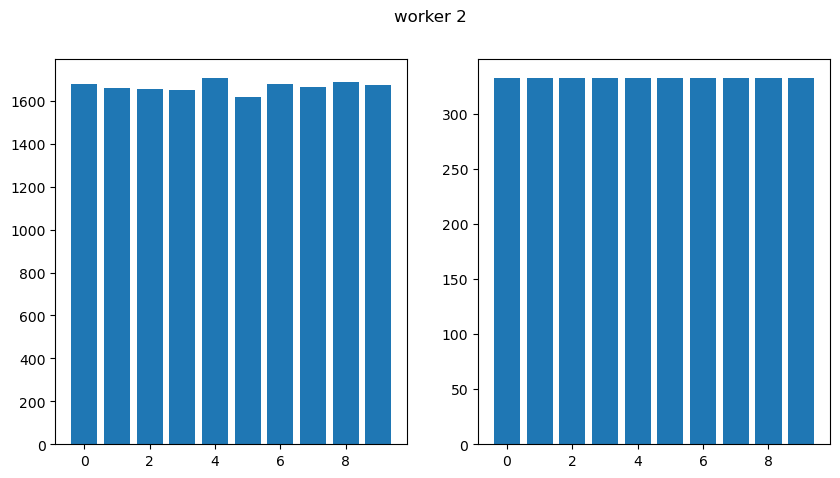

16666 3330 % of test  0.16653330666133226


In [ ]:
print(Data.SPLITS[2])
trains,tests = d2.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.targets,return_counts = True)
    val1,counts1 = np.unique(test.targets,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()
    print(len(train),len(test),"% of test ",len(test)/(len(train)+len(test)))

ident_same


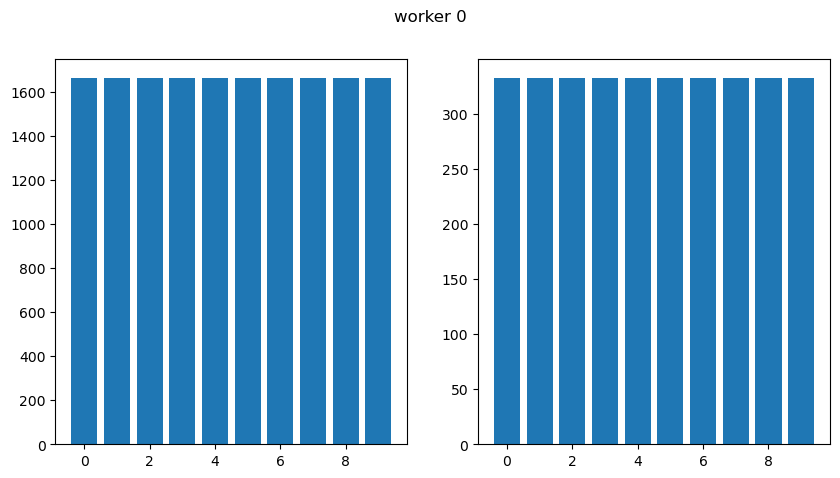

16660 3330 % of test  0.16658329164582292


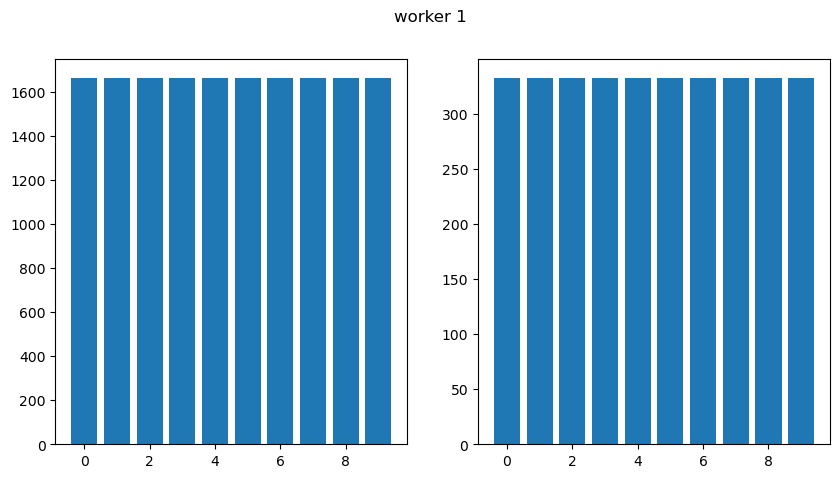

16660 3330 % of test  0.16658329164582292


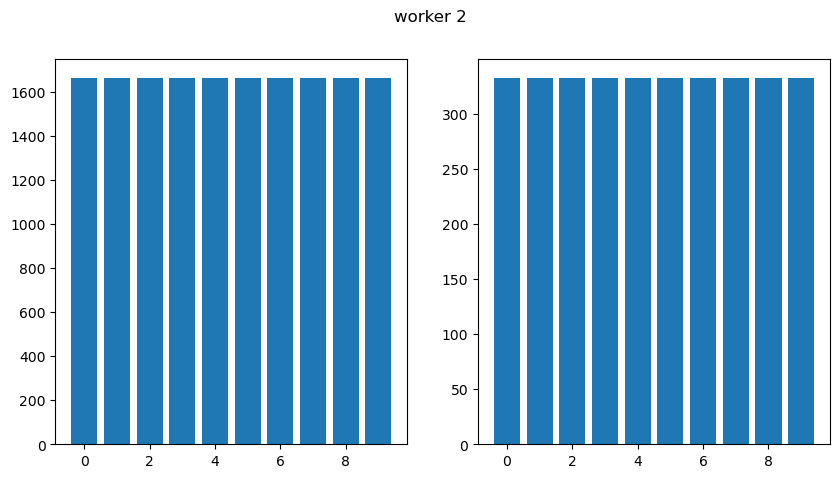

16660 3330 % of test  0.16658329164582292


In [ ]:
print(Data.SPLITS[3])
trains,tests = d3.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.targets,return_counts = True)
    val1,counts1 = np.unique(test.targets,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()
    print(len(train),len(test),"% of test ",len(test)/(len(train)+len(test)))

noSplit


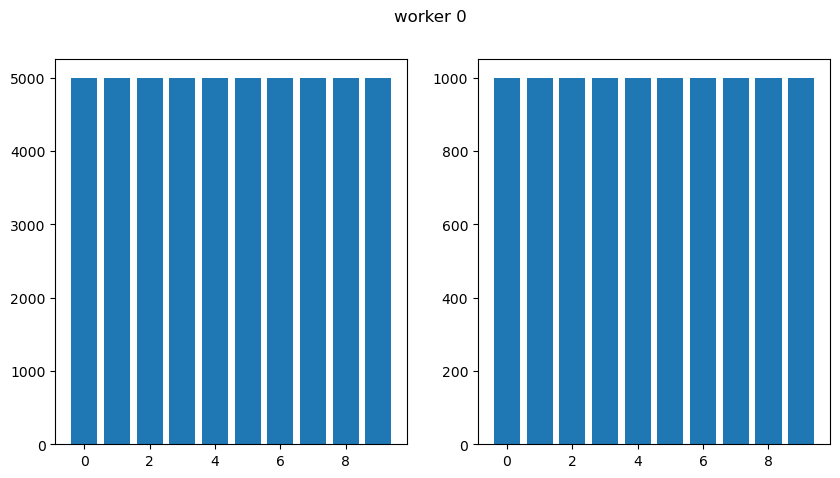

50000 10000 % of test  0.16666666666666666


In [ ]:
print(Data.SPLITS[4])
train,test = d4.get_data()

plt.figure(figsize=(10, 5))
val,counts = np.unique(train[0].targets,return_counts = True)
val1,counts1 = np.unique(test[0].targets,return_counts = True)

plt.subplot(121)
plt.bar(val,counts)
plt.subplot(122)
plt.bar(val1,counts1)
plt.suptitle("worker 0")
plt.show()
print(len(train[0]),len(test[0]),"% of test ",len(test[0])/(len(train[0])+len(test[0])))

noSplit_test_split


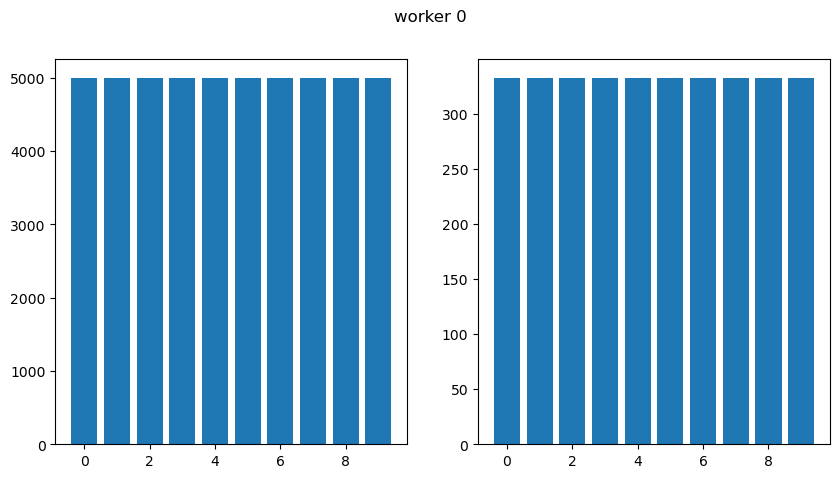

50000 3330 % of test  0.06244140258766173


In [ ]:
print(Data.SPLITS[5])
train,test = d5.get_data()

plt.figure(figsize=(10, 5))
val,counts = np.unique(train[0].targets,return_counts = True)
val1,counts1 = np.unique(test[0].targets,return_counts = True)

plt.subplot(121)
plt.bar(val,counts)
plt.subplot(122)
plt.bar(val1,counts1)
plt.suptitle("worker 0")
plt.show()
print(len(train[0]),len(test[0]),"% of test ",len(test[0])/(len(train[0])+len(test[0])))

## Model

In [ ]:
print("train Model")

In [ ]:
d = Data(split = "noSplit",n_workers=1,environment="kaggle")

In [ ]:
print("noSplit")
train,test = d.get_data()

plt.figure(figsize=(10, 5))
val,counts = np.unique(train[0].targets,return_counts = True)
val1,counts1 = np.unique(test[0].targets,return_counts = True)

plt.subplot(121)
plt.bar(val,counts)
plt.subplot(122)
plt.bar(val1,counts1)
plt.suptitle("worker 0")
plt.show()
print(len(train[0]),len(test[0]),"% of test ",len(test[0])/(len(train[0])+len(test[0])))

In [ ]:
m = Model("Model")
m.set_optimizer(optim.SGD(m.net.parameters(), lr=0.01))
trainloader = d.get_data_loaders()[0]['trainloader']
testloader = d.get_data_loaders()[0]['testloader']

m.run(epoch = 100,train_loader = trainloader,test_loader = testloader)

In [ ]:
print(m.stat_collector.loss[-1])
print(m.stat_collector.accuracy[-1])
m.stat_collector.loss_plot()
m.stat_collector.acc_plot()

In [ ]:
print("train Model")

In [ ]:
d = Data(split = "noSplit_test_split",n_workers=3,environment = "")

noSplit


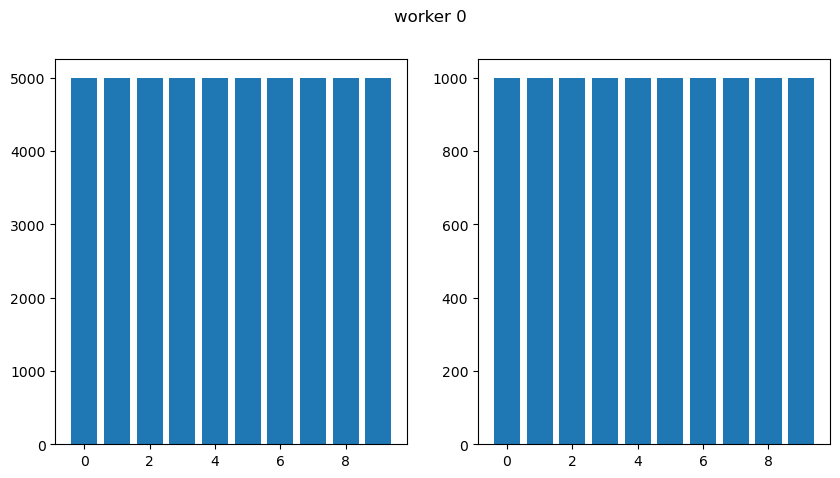

50000 10000 % of test  0.16666666666666666


In [ ]:
print("noSplit_test_split")
train,test = d.get_data()

plt.figure(figsize=(10, 5))
val,counts = np.unique(train[0].targets,return_counts = True)
val1,counts1 = np.unique(test[0].targets,return_counts = True)

plt.subplot(121)
plt.bar(val,counts)
plt.subplot(122)
plt.bar(val1,counts1)
plt.suptitle("worker 0")
plt.show()
print(len(train[0]),len(test[0]),"% of test ",len(test[0])/(len(train[0])+len(test[0])))

In [ ]:
m = Model("Model")
m.set_optimizer(optim.SGD(m.net.parameters(), lr=0.01))
trainloader = d.get_data_loaders()[0]['trainloader']
testloader = d.get_data_loaders()[0]['testloader']

m.run(epoch = 100,train_loader = trainloader,test_loader = testloader)

In [ ]:
print(m.stat_collector.loss[-1])
print(m.stat_collector.accuracy[-1])
m.stat_collector.loss_plot()
m.stat_collector.acc_plot()

## Federated learning

### Identical split, running with update on each iteration

In [ ]:
def model_creator(w_num):
    name = f"FederatedModel_{w_num}"

    model = Model(name)
    
    #opt = Optimizer_SGD(params=model.net.parameters())
    opt = optim.SGD(model.net.parameters(), lr=0.01)
    preconditioner = None
    scaller = None
    model.set_optimizer(opt)
    #model.set_preconditioner(preconditioner)
    #model.set_scaller(scaller)
    return model

In [ ]:
d = Data(split = "ident",n_workers=1,environment="kaggle")

In [ ]:
trains,tests = d.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.targets,return_counts = True)
    val1,counts1 = np.unique(test.targets,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()

In [ ]:
"""
s = server(num_workers=1,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=30,T=1)
"""

In [ ]:
"""
print(s.workers[0].model.stat_collector.loss[-1])
print(s.workers[0].model.stat_collector.accuracy[-1])
s.workers[0].model.stat_collector.loss_plot()
s.workers[0].model.stat_collector.acc_plot()
"""

### Identical split

In [ ]:
print("identical")

In [ ]:
def model_creator1(w_num):
    name = f"FederatedIdentModel_{w_num}_random_indent"
    #opt = Optimizer_SGD()
    preconditioner = None
    scaller = None

    model = Model(name)
    #model.set_optimizer(opt)
    #model.set_preconditioner(preconditioner)
    #model.set_scaller(scaller)
    return model

In [ ]:
def model_creator2(w_num):
    name = f"FederatedIdentModel_{w_num}_ident_same"
    #opt = Optimizer_SGD()
    preconditioner = None
    scaller = None

    model = Model(name)
    #model.set_optimizer(opt)
    #model.set_preconditioner(preconditioner)
    #model.set_scaller(scaller)
    return model

In [ ]:
def model_creator3(w_num):
    name = f"FederatedIdentModel_{w_num}"
    #opt = Optimizer_SGD()
    preconditioner = None
    scaller = None

    model = Model(name)
    #model.set_optimizer(opt)
    #model.set_preconditioner(preconditioner)
    #model.set_scaller(scaller)
    return model

In [ ]:
Data.SPLITS

['het',
 'ident',
 'random_indent',
 'ident_same',
 'noSplit',
 'noSplit_test_split']

In [ ]:
d1 = Data(split = "random_indent",n_workers=3,environment = "")
d2 = Data(split = "ident_same",n_workers=3,environment = "")
d3 = Data(split = "ident",n_workers=3,environment = "")

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
s = server(num_workers=3,data = d1.get_data_loaders(),model_creator=model_creator1)
s.run(n_iter=100,T=20)

stat_collectors = [w.model.stat_collector for w in s.workers]
stat_collector = array_mean_object(stat_collectors,"FederatedIdentModel_random_indent")

In [ ]:
print(stat_collector.loss[-1])
print(stat_collector.accuracy[-1])
stat_collector.loss_plot()
stat_collector.acc_plot()

In [ ]:
s = server(num_workers=3,data = d2.get_data_loaders(),model_creator=model_creator2)
s.run(n_iter=100,T=20)

stat_collectors = [w.model.stat_collector for w in s.workers]
stat_collector = array_mean_object(stat_collectors,"FederatedIdentModel_ident_same")

In [ ]:
print(stat_collector.loss[-1])
print(stat_collector.accuracy[-1])
stat_collector.loss_plot()
stat_collector.acc_plot()

In [ ]:
s = server(num_workers=3,data = d3.get_data_loaders(),model_creator=model_creator3)
s.run(n_iter=100,T=20)

stat_collectors = [w.model.stat_collector for w in s.workers]
stat_collector = array_mean_object(stat_collectors,"FederatedIdentModel_ident")

1.9426933997943079
0.20670670670670668


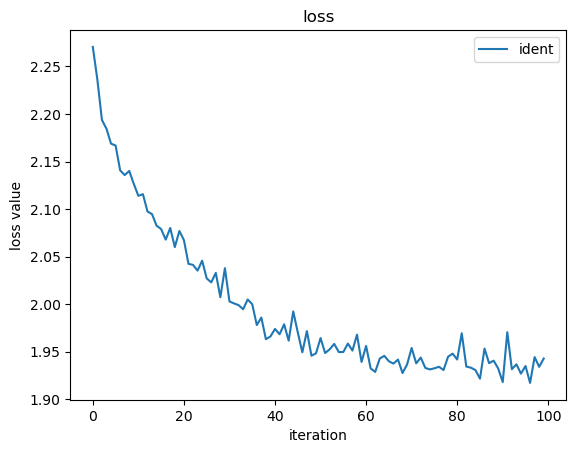

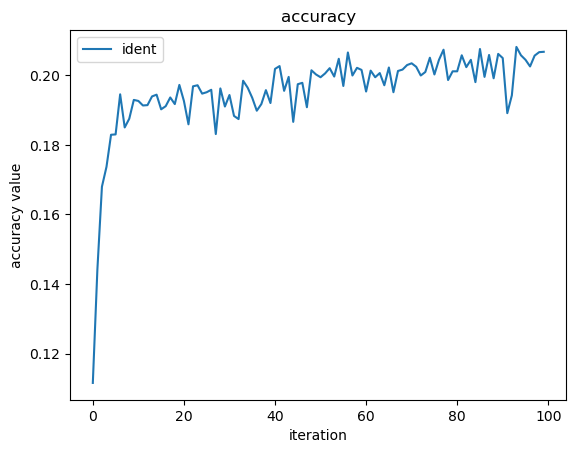

In [ ]:
print(stat_collector.loss[-1])
print(stat_collector.accuracy[-1])
stat_collector.loss_plot()
stat_collector.acc_plot()

## Heterogenious

In [ ]:
def model_creator(w_num):
    name = f"FederatedHetModel_{w_num}"
    #opt = Optimizer_SGD()
    preconditioner = None
    scaller = None

    model = Model(name)
    #model.set_optimizer(opt)
    #model.set_preconditioner(preconditioner)
    #model.set_scaller(scaller)
    return model

In [ ]:
d = Data(split = "het",n_workers=3,environment="kaggle")

In [ ]:
trains,tests = d.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.targets,return_counts = True)
    val1,counts1 = np.unique(test.targets,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()

In [ ]:
len(trains[0]),len(trains[1]),len(trains[2]),len(trains[0])+len(trains[1])+len(trains[2])

In [ ]:
len(tests[0]),len(tests[1]),len(tests[2]),len(tests[0])+len(tests[1])+len(tests[2])

In [ ]:
s = server(num_workers=3,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=100,T=10)

In [ ]:
stat_collectors = [w.model.stat_collector for w in s.workers]
stat_collector = array_mean_object(stat_collectors,"heterogeneous")